# Welcome
This notebook shall answer assignment_1a question 3.

# Table of Contents <a name="toc"></a>

* [Imports](#imports)
* [Global](#global)
* [Helper Functions](#helper_functions)
* [Question 3: Optimal Hidden Neurons](#optimal_hidden_neurons)
    * [Model Parameters](#model_parameters)
    * [Create the Model](#create_the_model)
    * [Run the Model](#run_the_model)
    * [Save Data Objects](#save_data_objects)
    * [Plot Model Performance](#plot_model_performance)
    * [Comparing Models](#comparing_models)
    * [Eyeballing Hidden Neurons](#eyeballing_hidden_neurons)
* [Conclusion](#conclusion)
    * [Try Test Set](#try_test_set)

# Imports <a name="imports"></a> 
[Back to top](#toc)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
import time

from tensorflow import keras
from tqdm.keras import TqdmCallback
from sklearn import preprocessing
from sklearn.model_selection import KFold, train_test_split

In [2]:
X_train = np.load('data/X_train.npy')
X_test = np.load('data/X_test.npy')
Y_train = np.load('data/Y_train.npy')
Y_test = np.load('data/Y_test.npy')
print("Data loaded")

Data loaded


# Global <a name="global"></a> 
[Back to top](#toc)

In [3]:
seed = 10
np.random.seed(seed)
tf.random.set_seed(seed)

cv_5fold = KFold(n_splits=5, random_state=seed, shuffle=False)
cv_5fold.get_n_splits(X_train)

# data objects
histories = {} 
times = {}

C:\Users\user\anaconda3\envs\cz4042_env\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


# Helper Functions <a name="helper_functions"></a> 
[Back to top](#toc)

### plot_history_object()

In [4]:
def plot_history_object(histories, model_name, history_object):    
    plt.plot(histories[model_name][history_object], label='train_'+history_object)
    plt.plot(histories[model_name]['val_'+history_object], label='val_'+history_object)
    plt.ylabel(history_object)
    plt.xlabel('No. epoch')
    plt.legend(loc="center right")
    plt.show()

### TimeHistory()

In [5]:
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

### histories_saver()

In [6]:
# filename like 'data/histories_q1.json'
def histories_saver(histories, filename):
    histories_json = {}
    for key in histories.keys():
        histories_json[key] = histories[key].history

    with open(filename, 'w') as file:
        json.dump(histories_json, file)

    print("All histories saved")

# Question 3: Optimal Hidden Neurons  <a name="optimal_hidden_neurons"></a>
[Back to top](#toc)

<i>Find the optimal number of hidden neurons for the 3-layer network designed in part (2).

* a) Plot the cross-validation accuracies against the number of epochs for different number of hidden-layer neurons. Limit the search space of number of neurons to {5,10,15,20,25}.
* b) Select the optimal number of neurons for the hidden layer. State the rationale for your selection.
* c) Plot the train and test accuracies against epochs with the optimal number of neurons. </i>

### Model Parameters <a name="model_parameters"></a> 
[Back to top](#toc)

In [7]:
num_neurons = [5,10,15,20,25]
num_classes = 3

weight_decay_parameter = 10e-6
regularization = keras.regularizers.l2(weight_decay_parameter)

optimizer = 'sgd'
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ['accuracy', keras.metrics.SparseCategoricalCrossentropy(from_logits=True)]

epochs = 300 # from assignment_1a q1
learning_rate = 0.01
batch_size = 16 # from assignment_1a q2

# callbacks = [
#     TqdmCallback(verbose=1), 
#     tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5),
#     time_callback
# ]

# times = time_callback.times

print("Model Parameters set")

Model Parameters set


### Create the model <a name="create_the_model"></a> 
[Back to top](#toc)

In [8]:
def create_model(num_neurons, num_classes, regularization, optimizer, loss, metrics):
    model = keras.Sequential([
        keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=regularization, bias_regularizer=regularization),
        keras.layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)
    
    print("Model created")
    return model

### Run the model <a name="run_the_model"></a> 
[Back to top](#toc)

In [9]:
for num_neuron in num_neurons:    
    for index, (train_fold_index, val_fold_index) in enumerate(cv_5fold.split(X_train)):
        X_train_fold = X_train[train_fold_index]
        X_val_fold = X_train[val_fold_index]
        Y_train_fold = Y_train[train_fold_index]
        Y_val_fold = Y_train[val_fold_index]

        model = create_model(num_neuron, num_classes, regularization, optimizer, loss, metrics)

        time_callback = TimeHistory()
        callbacks = [TqdmCallback(verbose=1), time_callback]

        model_name = "num_neuron_" + str(num_neuron) + "_fold_" + str(index+1)
        
        print("Training ", model_name)

        histories[model_name] = model.fit(X_train_fold, Y_train_fold,
                                                                epochs=epochs,
                                                                verbose = 0,
                                                                batch_size=batch_size,
                                                                validation_data=(X_val_fold, Y_val_fold),
                                                                callbacks=callbacks)
        
        times[model_name] = time_callback.times

Model created


Training  num_neuron_5_fold_1

Model created


Training  num_neuron_5_fold_2

Model created


Training  num_neuron_5_fold_3

Model created


Training  num_neuron_5_fold_4

Model created


Training  num_neuron_5_fold_5

Model created


Training  num_neuron_10_fold_1

Model created


Training  num_neuron_10_fold_2

Model created


Training  num_neuron_10_fold_3

Model created


Training  num_neuron_10_fold_4

Model created


Training  num_neuron_10_fold_5

Model created


Training  num_neuron_15_fold_1

Model created


Training  num_neuron_15_fold_2

Model created


Training  num_neuron_15_fold_3

Model created


Training  num_neuron_15_fold_4

Model created


Training  num_neuron_15_fold_5

Model created


Training  num_neuron_20_fold_1

Model created


Training  num_neuron_20_fold_2

Model created


Training  num_neuron_20_fold_3

Model created


Training  num_neuron_20_fold_4

Model created


Training  num_neuron_20_fold_5

Model created


Training  num_neuron_25_fold_1

Model created


Training  num_neuron_25_fold_2

Model created


Training  num_neuron_25_fold_3

Model created


Training  num_neuron_25_fold_4

Model created


Training  num_neuron_25_fold_5



### Save Data Objects <a name="save_data_objects"></a> 
[Back to top](#toc)

In [10]:
histories_saver(histories, "data/histories_q3.json")

All histories saved


In [11]:
np.save('data/times_q3', times)
print('All times saved')

All times saved


In [12]:
with open('data/histories_q3.json') as json_file:
    histories = json.load(json_file)
print('histories reloaded')

times = np.load('data/times_q3.npy', allow_pickle=True).item() 
print('times reloaded')

histories reloaded
times reloaded


### Plot Model Performance <a name="plot_model_performance"></a> 
[Back to top](#toc)

Plotting model performance for  num_neuron_5_fold_1


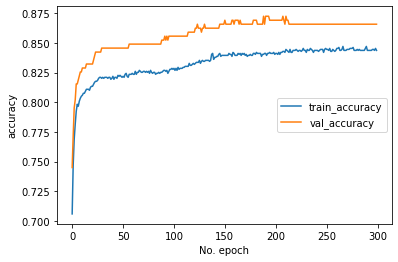

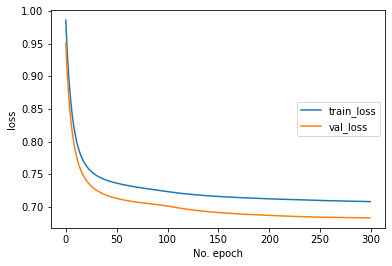

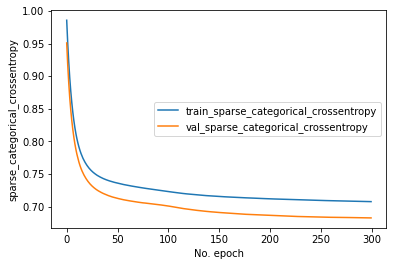

Plotting model performance for  num_neuron_5_fold_2


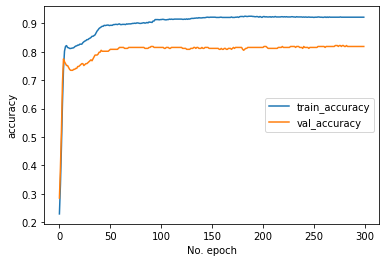

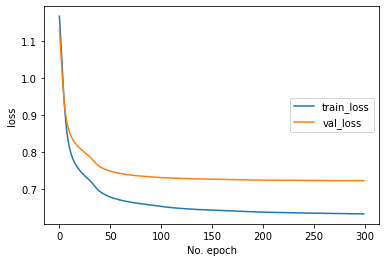

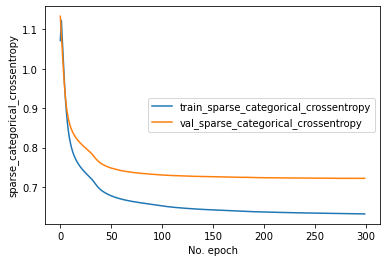

Plotting model performance for  num_neuron_5_fold_3


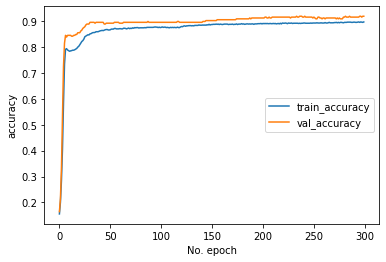

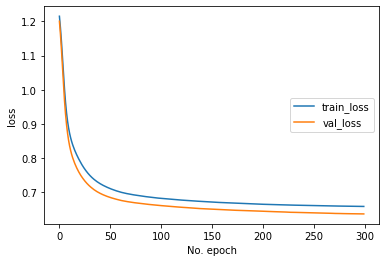

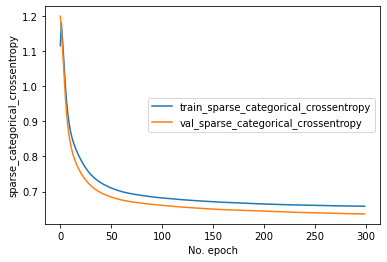

Plotting model performance for  num_neuron_5_fold_4


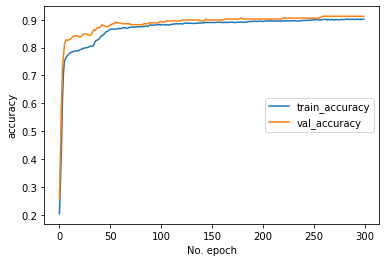

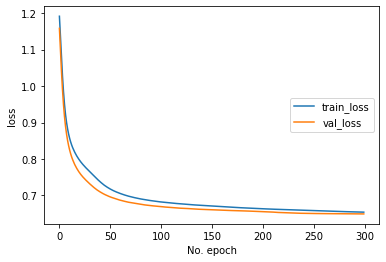

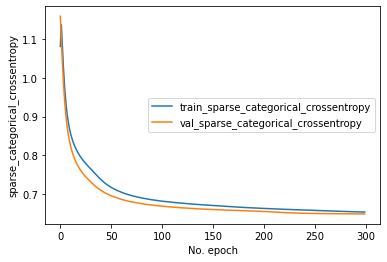

Plotting model performance for  num_neuron_5_fold_5


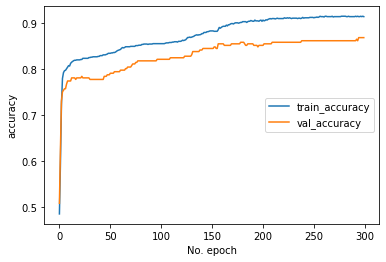

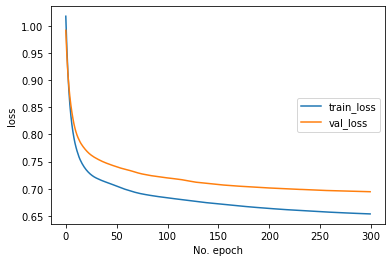

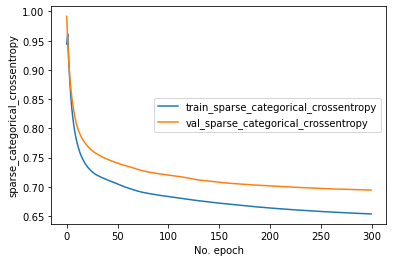

Plotting model performance for  num_neuron_10_fold_1


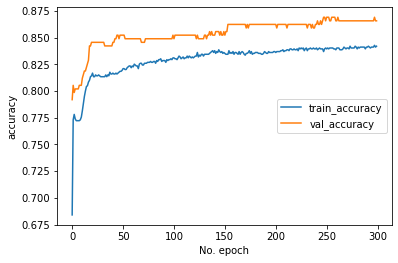

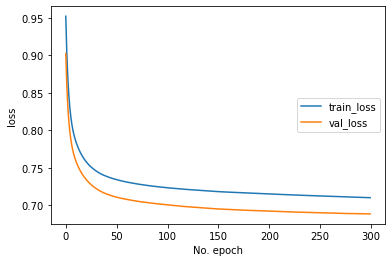

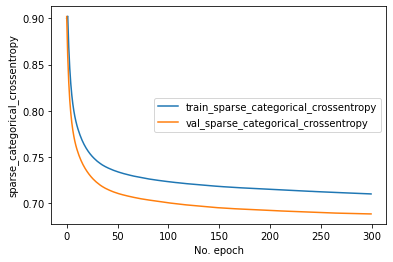

Plotting model performance for  num_neuron_10_fold_2


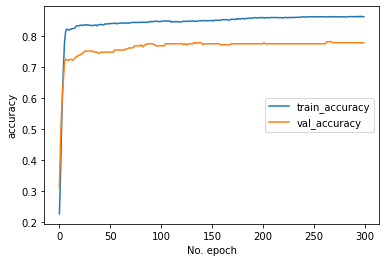

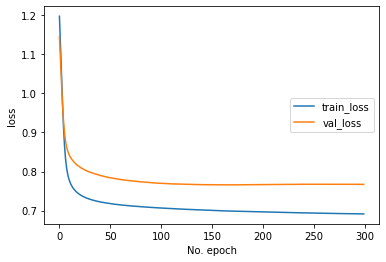

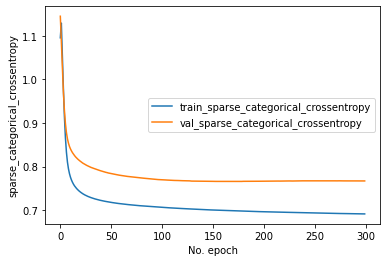

Plotting model performance for  num_neuron_10_fold_3


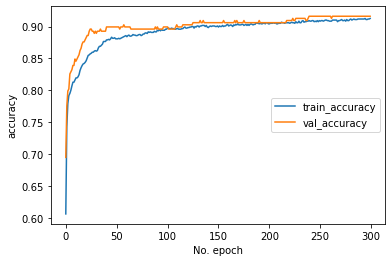

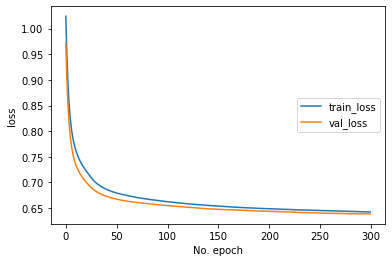

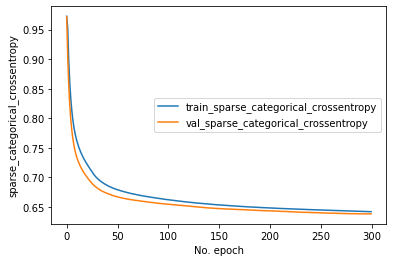

Plotting model performance for  num_neuron_10_fold_4


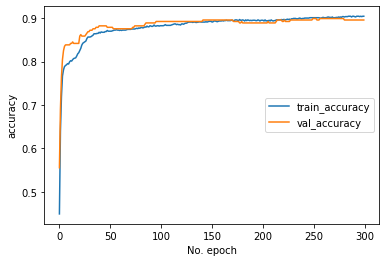

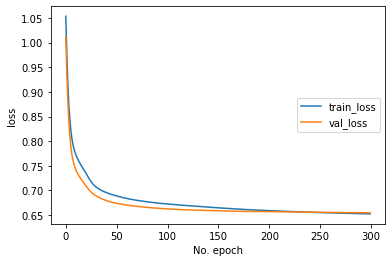

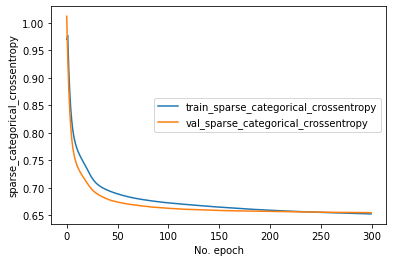

Plotting model performance for  num_neuron_10_fold_5


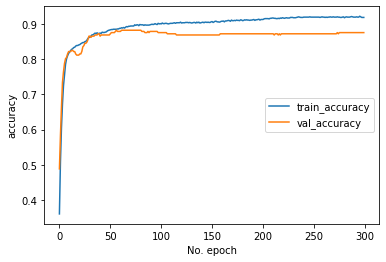

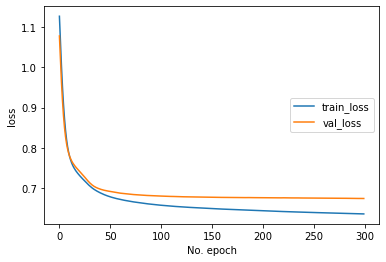

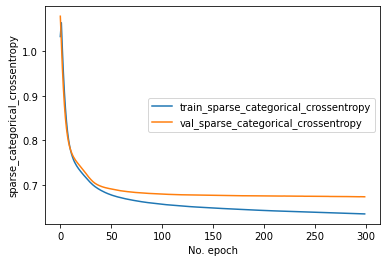

Plotting model performance for  num_neuron_15_fold_1


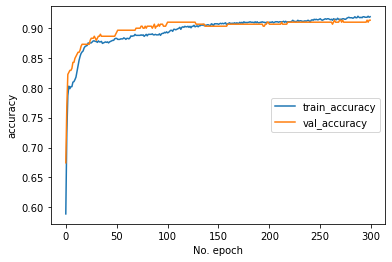

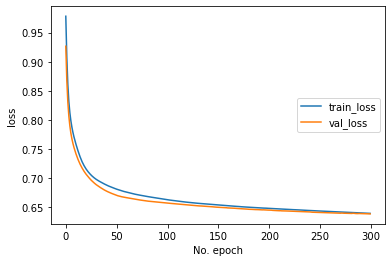

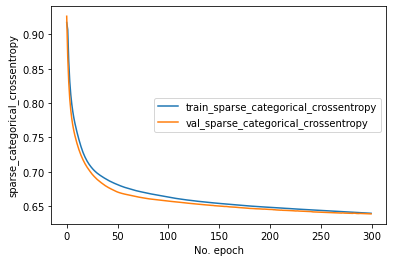

Plotting model performance for  num_neuron_15_fold_2


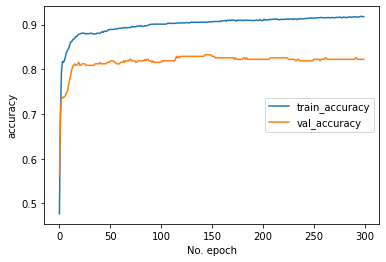

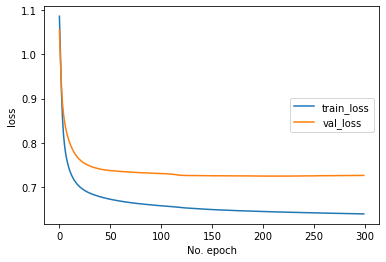

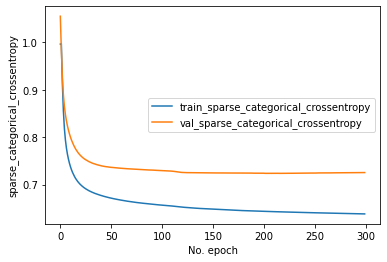

Plotting model performance for  num_neuron_15_fold_3


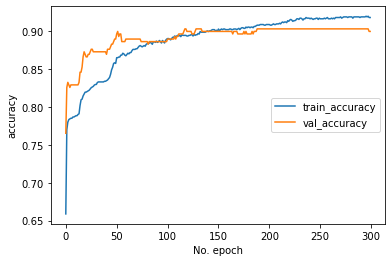

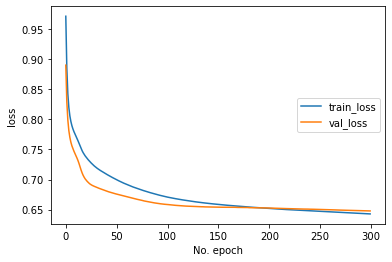

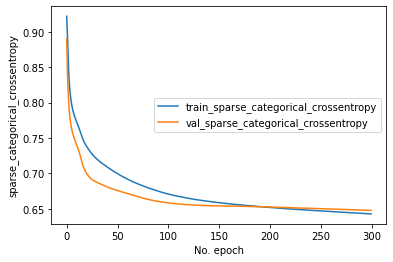

Plotting model performance for  num_neuron_15_fold_4


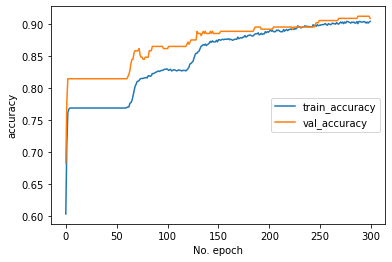

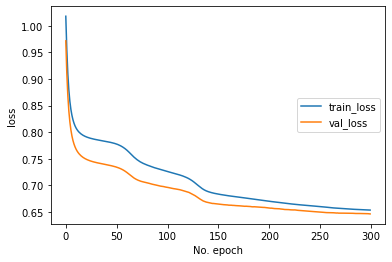

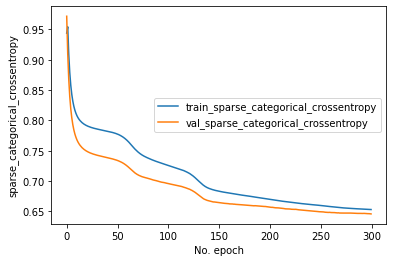

Plotting model performance for  num_neuron_15_fold_5


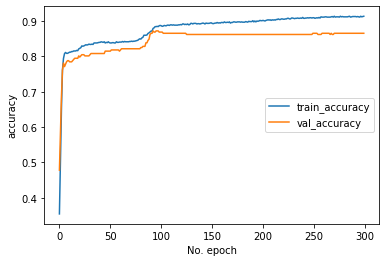

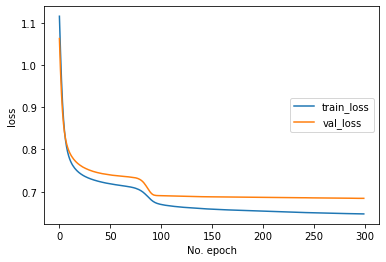

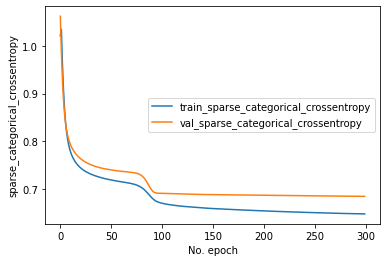

Plotting model performance for  num_neuron_20_fold_1


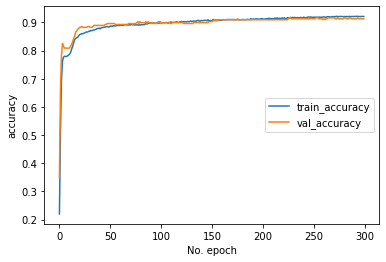

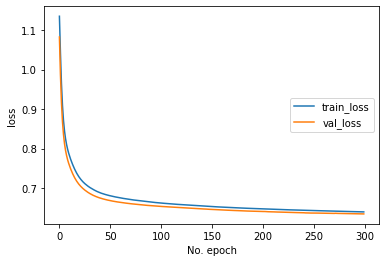

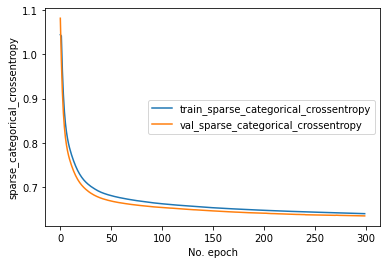

Plotting model performance for  num_neuron_20_fold_2


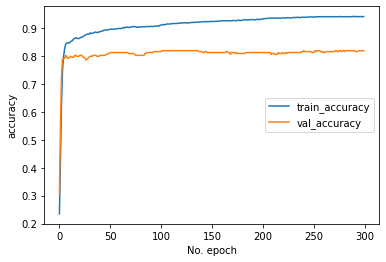

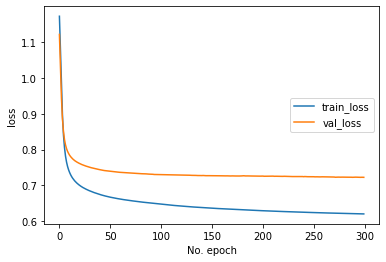

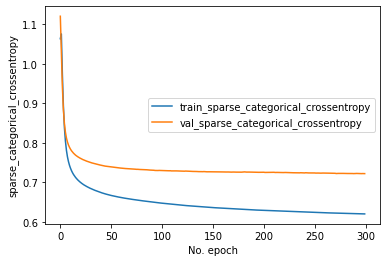

Plotting model performance for  num_neuron_20_fold_3


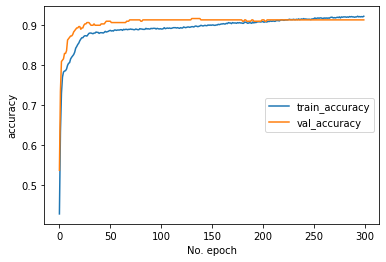

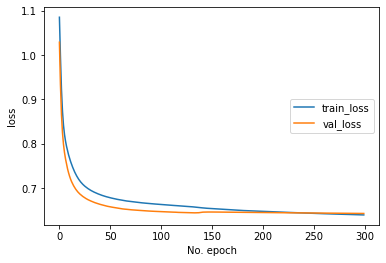

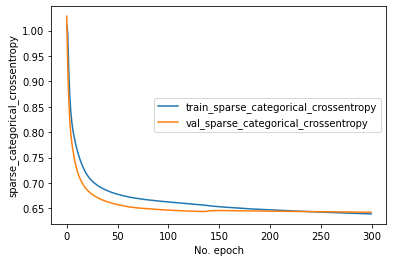

Plotting model performance for  num_neuron_20_fold_4


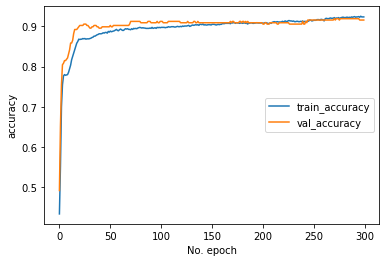

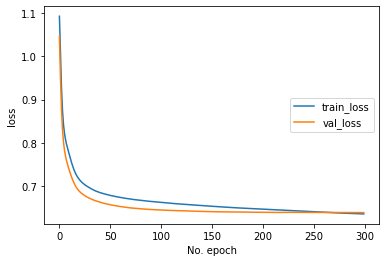

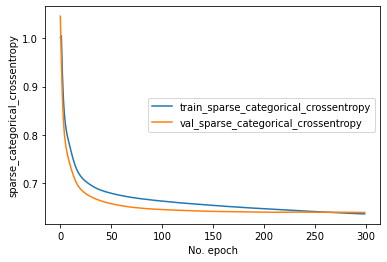

Plotting model performance for  num_neuron_20_fold_5


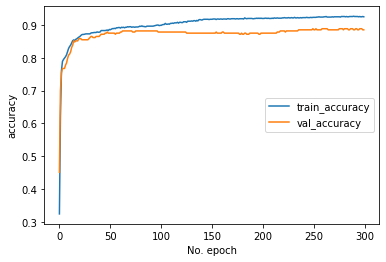

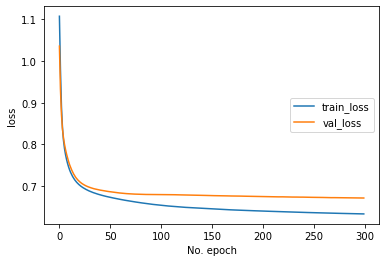

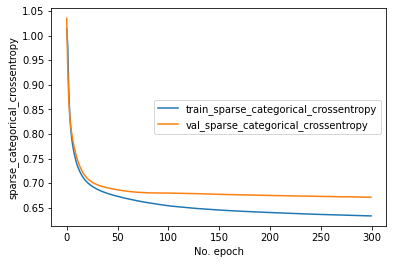

Plotting model performance for  num_neuron_25_fold_1


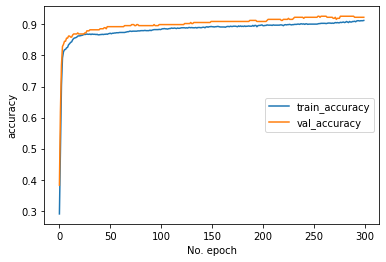

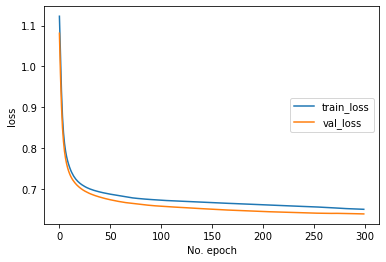

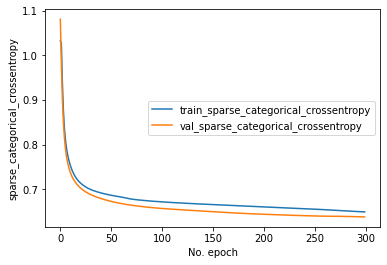

Plotting model performance for  num_neuron_25_fold_2


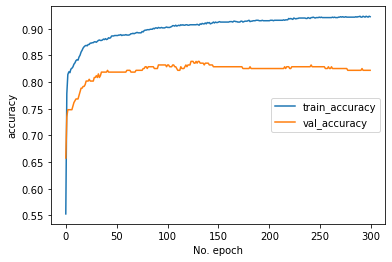

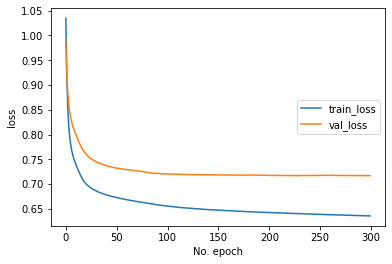

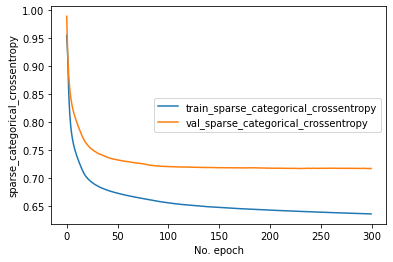

Plotting model performance for  num_neuron_25_fold_3


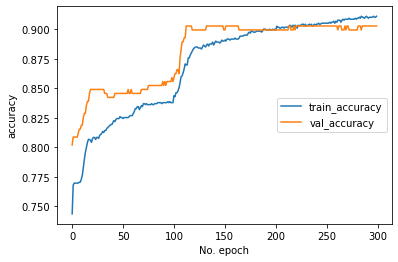

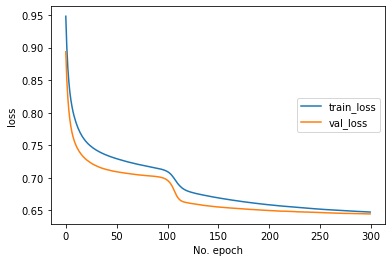

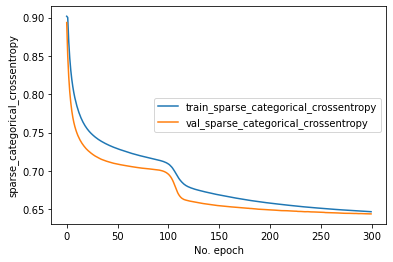

Plotting model performance for  num_neuron_25_fold_4


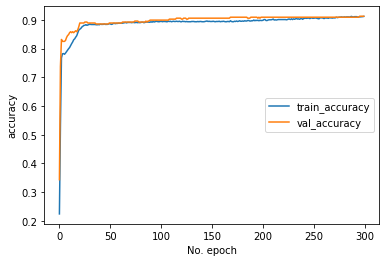

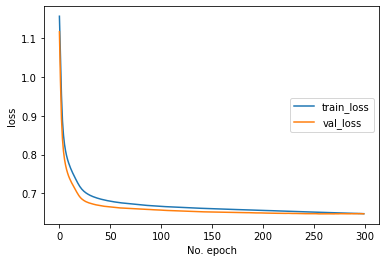

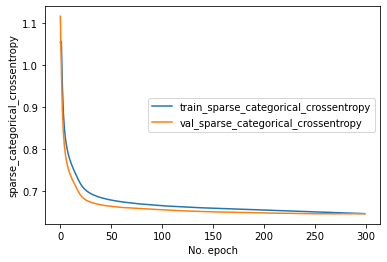

Plotting model performance for  num_neuron_25_fold_5


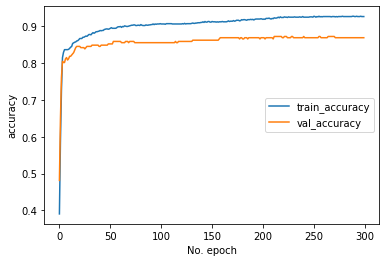

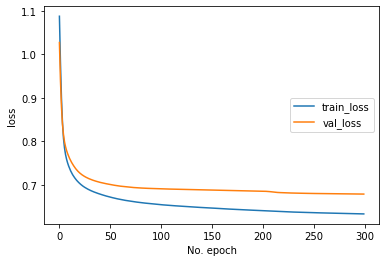

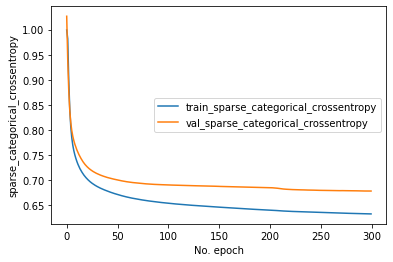

In [13]:
for model_name in histories.keys():
    print("Plotting model performance for ", model_name)
    for history_object in ['accuracy', 'loss', 'sparse_categorical_crossentropy']:
        plot_history_object(histories, model_name, history_object)

### Comparing Models <a name="comparing_models"></a> 
[Back to top](#toc)

In [30]:
ave_times = []
for num_neuron in num_neurons:
    total_time_batch = 0
    count = 0
    for index in range(5):
        num_neuron_times = times['num_neuron_' + str(num_neuron) + '_fold_' + str(index+1)]
        total_time_batch += np.sum(num_neuron_times)
        count += len(num_neuron_times)
    ave_times.append(total_time_batch/count)

print("ave_times: ", ave_times)        

ave_times:  [0.0649254519144694, 0.06704280249277751, 0.06775678364435832, 0.0673264775276184, 0.06882147137324016]


Text(0.5, 1.0, 'num_neuron vs ave_time (per epoch)')

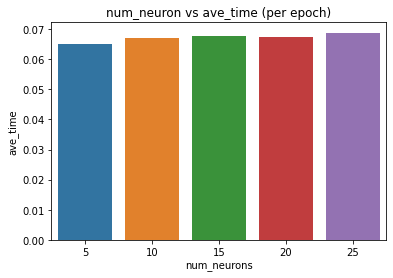

In [31]:
df_ave_times = pd.DataFrame(ave_times, columns =['ave_time']) 
df_num_neurons = pd.DataFrame(num_neurons, columns =['num_neurons']) 
df_ave_times_num_neurons = pd.concat([df_num_neurons, df_ave_times], axis=1)

sns.barplot(data=df_ave_times_num_neurons, x="num_neurons", y="ave_time").set_title("num_neuron vs ave_time (per epoch)")

In [32]:
ave_loss = []
ave_val_loss = []
ave_accuracy = []
ave_val_accuracy = []
ave_sparse_categorical_crossentropy = []
ave_val_sparse_categorical_crossentropy = []

for num_neuron in num_neurons:
    num_neuron_loss = []
    num_neuron_val_loss = []
    num_neuron_accuracy = []
    num_neuron_val_accuracy = []
    num_neuron_sparse_categorical_crossentropy = []
    num_neuron_val_sparse_categorical_crossentropy = []
    
    for index in range(5):
        history = histories['num_neuron_' + str(num_neuron) + '_fold_' + str(index+1)]

        num_neuron_loss.append(np.array(history['loss']))
        num_neuron_val_loss.append(np.array(history['val_loss']))
        num_neuron_accuracy.append(np.array(history['accuracy']))
        num_neuron_val_accuracy.append(np.array(history['val_accuracy']))
        num_neuron_sparse_categorical_crossentropy.append(np.array(history['sparse_categorical_crossentropy']))
        num_neuron_val_sparse_categorical_crossentropy.append(np.array(history['val_sparse_categorical_crossentropy']))
        
    ave_loss.append(np.mean(num_neuron_loss, axis=0))
    ave_val_loss.append(np.mean(num_neuron_val_loss, axis=0))
    ave_accuracy.append(np.mean(num_neuron_accuracy, axis=0))
    ave_val_accuracy.append(np.mean(num_neuron_val_accuracy, axis=0))
    ave_sparse_categorical_crossentropy.append(np.mean(num_neuron_sparse_categorical_crossentropy, axis=0))
    ave_val_sparse_categorical_crossentropy.append(np.mean(num_neuron_val_sparse_categorical_crossentropy, axis=0))

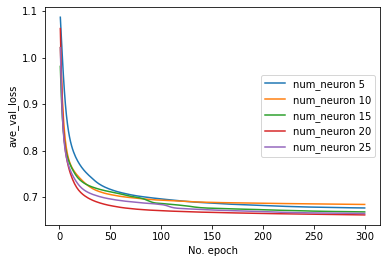

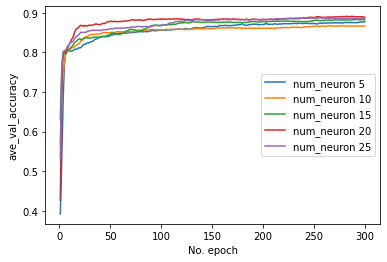

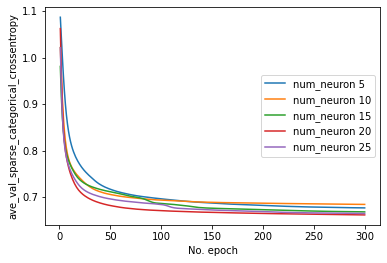

In [52]:
x = np.arange(1, 301)

for i in range(5):
    plt.plot(x, ave_val_loss[i], label='num_neuron '+str(num_neurons[i]))
    plt.ylabel("ave_val_loss")
    plt.xlabel("No. epoch")
    plt.legend(loc="center right")
plt.show()
    
for i in range(5):
    plt.plot(x, ave_val_accuracy[i], label='num_neuron '+str(num_neurons[i]))
    plt.ylabel("ave_val_accuracy")
    plt.xlabel("No. epoch")
    plt.legend(loc="center right")
plt.show()    

for i in range(5):
    plt.plot(x, ave_val_sparse_categorical_crossentropy[i], label='num_neuron '+str(num_neurons[i]))
    plt.ylabel("ave_val_sparse_categorical_crossentropy")
    plt.xlabel("No. epoch")
    plt.legend(loc="center right")    
plt.show()

### Eyeballing Hidden Neurons <a name="eyeballing_hidden_neurons"></a> 
[Back to top](#toc)

We can see from averaging the validation set values, that ```num_neuron = 20, 25``` has the best performance

Let's take a slightly more mathematical approach and consider the incremental time gains gotten from the incremental gains in performance, using the best results of ```num_neuron = 20``` as the baseline since it appears to be the best performer

In [56]:
df_incremental_time_gains = df_ave_times_num_neurons
df_incremental_time_gains['ave_time'] -= df_incremental_time_gains['ave_time'][3]
df_incremental_time_gains['ave_time'] = np.abs(df_incremental_time_gains['ave_time'])
df_incremental_time_gains

,num_neurons,ave_time
0,5,0.002401
1,10,0.000284
2,15,0.000430
3,20,0.000000
4,25,0.001495


In [57]:
incremental_ave_val_loss_gains = np.array(ave_val_loss).T.copy()
incremental_ave_val_accuracy_gains = np.array(ave_val_accuracy).T.copy()
incremental_ave_val_sparse_categorical_crossentropy_gains = np.array(ave_val_sparse_categorical_crossentropy).T.copy()

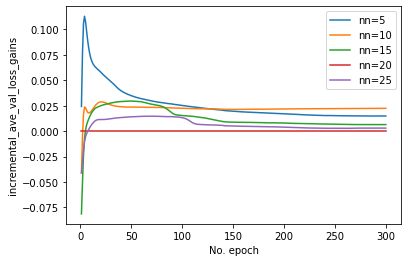

In [58]:
df_incremental_ave_val_loss_gains = pd.DataFrame(incremental_ave_val_loss_gains, columns =['nn=5', 'nn=10', 'nn=15', 'nn=20', 'nn=25']) 
df_incremental_ave_val_loss_gains_baseline = pd.DataFrame(df_incremental_ave_val_loss_gains['nn=20'], columns=['nn=20'])

for column in df_incremental_ave_val_loss_gains.columns:
    df_incremental_ave_val_loss_gains[column] = df_incremental_ave_val_loss_gains[column] - df_incremental_ave_val_loss_gains_baseline['nn=20']

for column in df_incremental_ave_val_loss_gains.columns:
    plt.plot(x, df_incremental_ave_val_loss_gains[column], label=column)
    plt.ylabel("incremental_ave_val_loss_gains")
    plt.xlabel("No. epoch")
    plt.legend(loc="upper right")    
plt.show()


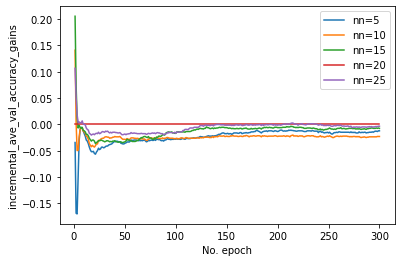

In [59]:
df_incremental_ave_val_accuracy_gains = pd.DataFrame(incremental_ave_val_accuracy_gains, columns =['nn=5', 'nn=10', 'nn=15', 'nn=20', 'nn=25']) 
df_incremental_ave_val_accuracy_gains_baseline = pd.DataFrame(df_incremental_ave_val_accuracy_gains['nn=20'], columns=['nn=20'])

for column in df_incremental_ave_val_accuracy_gains.columns:
    df_incremental_ave_val_accuracy_gains[column] = df_incremental_ave_val_accuracy_gains[column] - df_incremental_ave_val_accuracy_gains_baseline['nn=20']

for column in df_incremental_ave_val_accuracy_gains.columns:
    plt.plot(x, df_incremental_ave_val_accuracy_gains[column], label=column)
    plt.ylabel("incremental_ave_val_accuracy_gains")
    plt.xlabel("No. epoch")
    plt.legend(loc="upper right")    
plt.show()


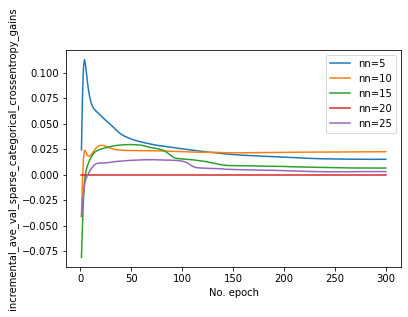

In [60]:
df_incremental_ave_val_sparse_categorical_crossentropy_gains = pd.DataFrame(incremental_ave_val_sparse_categorical_crossentropy_gains, columns =['nn=5', 'nn=10', 'nn=15', 'nn=20', 'nn=25']) 
df_incremental_ave_val_sparse_categorical_crossentropy_gains_baseline = pd.DataFrame(df_incremental_ave_val_sparse_categorical_crossentropy_gains['nn=20'], columns=['nn=20'])

for column in df_incremental_ave_val_sparse_categorical_crossentropy_gains.columns:
    df_incremental_ave_val_sparse_categorical_crossentropy_gains[column] = df_incremental_ave_val_sparse_categorical_crossentropy_gains[column] - df_incremental_ave_val_sparse_categorical_crossentropy_gains_baseline['nn=20']

for column in df_incremental_ave_val_sparse_categorical_crossentropy_gains.columns:
    plt.plot(x, df_incremental_ave_val_sparse_categorical_crossentropy_gains[column], label=column)
    plt.ylabel("incremental_ave_val_sparse_categorical_crossentropy_gains")
    plt.xlabel("No. epoch")
    plt.legend(loc="upper right")    
plt.show()


# Conclusion <a name="conclusion"></a> 
[Back to top](#toc)

> ```num_neurons=20``` is the optimal number of neurons to use

It has the best performance, and the time it takes is very comparable to the other models 

> use ```num_neurons=20``` for subsequent notebooks

### Try Test Set <a name="try_test_set"></a> 
[Back to top](#toc)

We shall use ```num_neuron=``` to check the performance of the model on the test set

In [61]:
num_neuron = 20
test_histories = {}
test_times = {}

model = create_model(num_neuron, num_classes, regularization, optimizer, loss, metrics)

time_callback = TimeHistory()
callbacks = [TqdmCallback(verbose=1), time_callback]

model_name = "test_set"

print("Training ", model_name)

test_histories[model_name] = model.fit(X_test, Y_test,
                                        epochs=epochs,
                                        verbose = 0,
                                        batch_size=batch_size,
                                        callbacks=callbacks)

test_times[model_name] = time_callback.times

Model created


Training  test_set



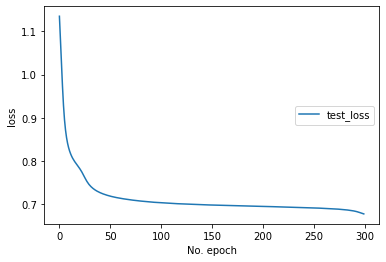

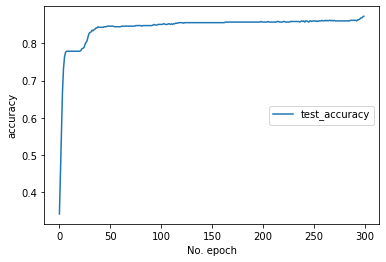

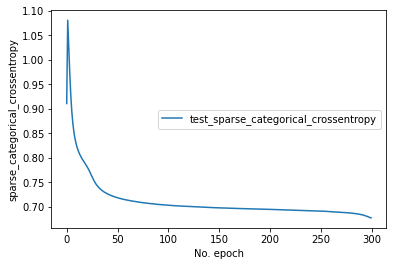

In [62]:
for history_object in ['loss', 'accuracy', 'sparse_categorical_crossentropy']:
    plt.plot(test_histories[model_name].history[history_object], label='test_'+history_object)
    plt.ylabel(history_object)
    plt.xlabel('No. epoch')
    plt.legend(loc="center right")
    plt.show()